In [8]:
import pickle
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


import importlib
imported_module = importlib.import_module("MLP")
importlib.reload(imported_module)
from MLP import MultiLayerPerceptron

from utils import *


In [9]:
path = "./mlp.pkl"
mlp = pickle.load(open(path, "rb"))

In [10]:
# df = get_data("../data/data.csv", headers=["id", "diagnosis"])
df = pd.read_csv("../data/df_test.csv")
X, Y = get_X_Y(df, labels=["diagnosis"], drops=[])
Y = labelize_Y(Y, y_label="diagnosis", value="M")
raw = X.copy()
print(df.describe())
print(X.head(2))
print(Y.head(2))
print(X.head(5))

               F0          F1          F2           F3          F4  \
count  114.000000  114.000000  114.000000   114.000000  114.000000   
mean    13.981211   19.614474   90.948509   643.195614    0.096361   
std      3.589080    4.848939   24.701099   347.418689    0.015175   
min      7.691000    9.710000   47.980000   170.400000    0.064290   
25%     11.495000   16.057500   74.052500   403.850000    0.084617   
50%     13.275000   18.835000   85.885000   545.800000    0.096200   
75%     16.015000   22.545000  104.000000   799.500000    0.106050   
max     24.250000   33.810000  166.200000  1761.000000    0.163400   

               F5          F6          F7          F8          F9  ...  \
count  114.000000  114.000000  114.000000  114.000000  114.000000  ...   
mean     0.102532    0.087605    0.048092    0.177525    0.062906  ...   
std      0.051478    0.076870    0.039103    0.027120    0.007624  ...   
min      0.026750    0.000000    0.000000    0.116700    0.049960  ...   

In [11]:
stds = mlp.normalization['stds']
means = mlp.normalization['means']
X = zscore(X, stds, means)

In [12]:
from sklearn.metrics import r2_score, accuracy_score

Y_pred = mlp.predict(X.to_numpy())
Y_pred_raw = mlp.predict(X.to_numpy(), raw=True)
print(accuracy_score(Y, Y_pred))

0.9824561403508771


Text(0, 0.5, 'Loss')

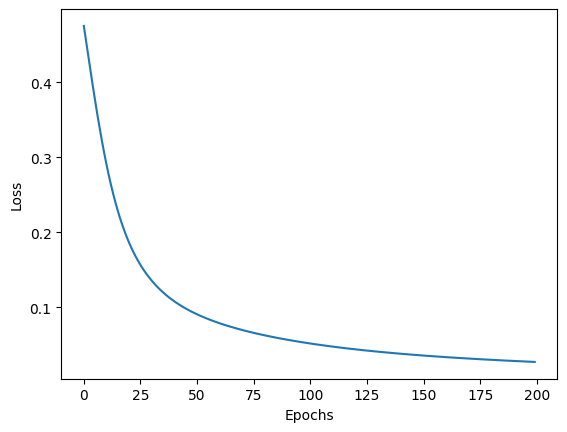

In [13]:
# plot losses

plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['losses'])
plt.xlabel('Epochs')
plt.ylabel('Loss')


Text(0, 0.5, 'Score')

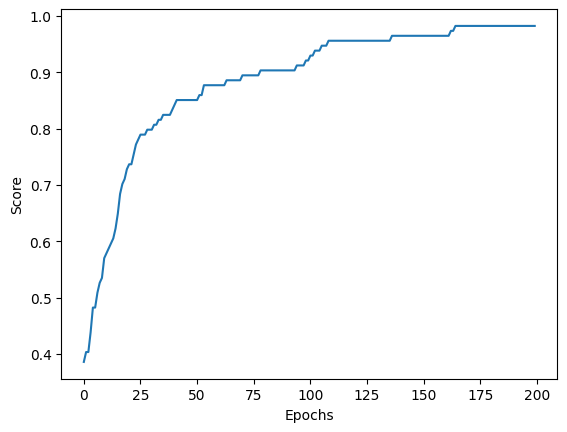

In [14]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['scores'])
plt.xlabel('Epochs')
plt.ylabel('Score')

Text(0, 0.5, 'binary cross entropy')

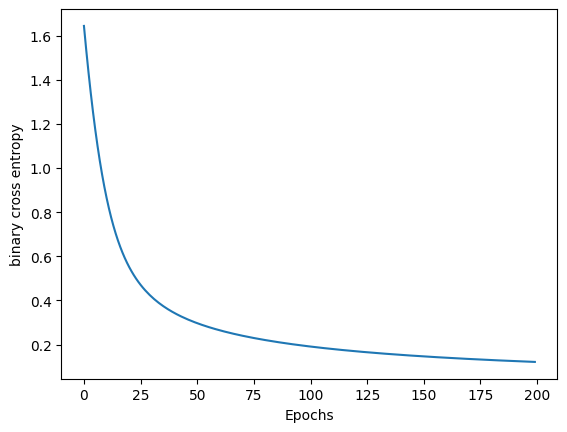

In [15]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['binary_cross_entropy'])
plt.xlabel('Epochs')
plt.ylabel('binary cross entropy')

Text(0, 0.5, 'Y')

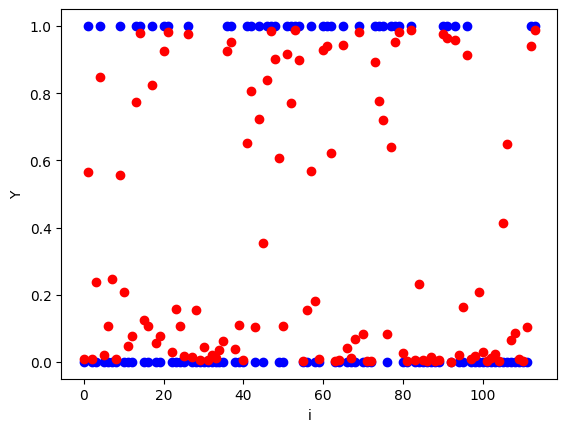

In [16]:
plt.clf()
plt.scatter(range(len(Y)), Y, color="blue")
plt.scatter(range(len(Y_pred_raw)), Y_pred_raw, color="red")
plt.xlabel('i')
plt.ylabel('Y')

In [17]:
# print(Y_pred_raw)

In [18]:
import seaborn as sn

<AxesSubplot:>

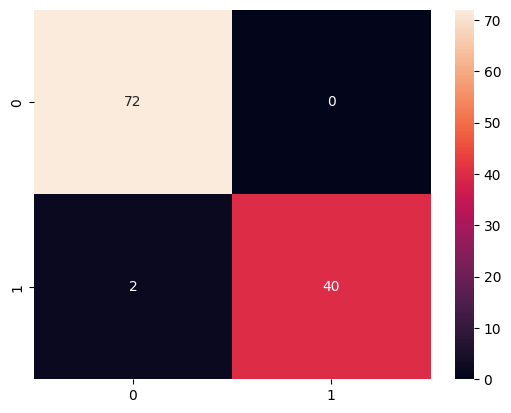

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y.to_numpy())

sn.heatmap(cm, annot=True)

<AxesSubplot:>

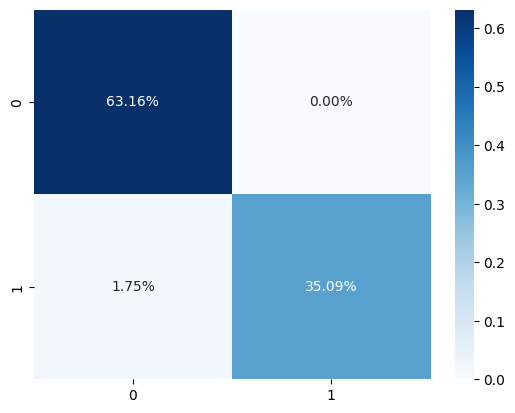

In [20]:
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [21]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# print(X.to_numpy())
# mlp.fit(X_train.to_numpy(), Y_train.to_numpy(), verbose=False, epochs=500, normalization={'stds': stds, 'means': means})

samples = np.arange(2, len(X_train), step=len(X_train) // 10)
# xs = []
val_scores = []
train_scores = []
for i in range(0, len(samples)):
    # mlp = MultiLayerPerceptron(seed=1)
    # mlp.add_layer(size=8)
    # mlp.add_layer(size=8)
    # mlp.add_layer(label="out`put_layer")
    # print(X_train.to_numpy()[:samples[i]].shape)
    mlp.fit(X_train.to_numpy()[:samples[i]], Y_train.to_numpy()[:samples[i]], epochs=100, normalization={'stds': stds, 'means': means})
    val_scores.append(accuracy_score(Y_test, mlp.predict(X_test.to_numpy())))
    train_scores.append(mlp.metrics['scores'][-1])
print(samples)
print(val_scores)
print(train_scores)


[ 2 12 22 32 42 52 62 72 82 92]
[0.9166666666666666, 1.0, 1.0, 0.9166666666666666, 1.0, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 1.0]
[1.0, 0.8333333333333334, 1.0, 0.96875, 0.9523809523809523, 0.9615384615384616, 0.9838709677419355, 0.9166666666666666, 0.9146341463414634, 0.9891304347826086]


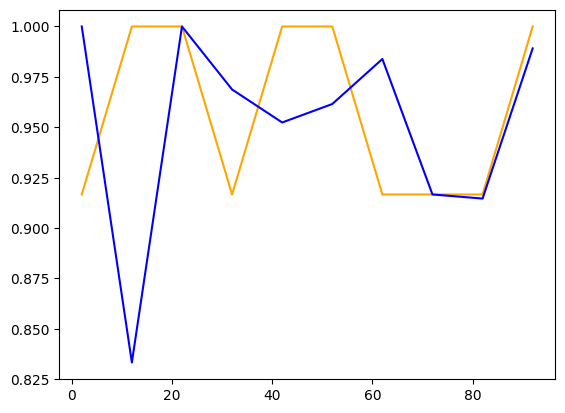

In [22]:
plt.clf()
plt.plot(samples, val_scores, color="orange")
plt.plot(samples, train_scores, color="blue")

In [23]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=150)

# # samples = np.arange(2, len(X_train), step=len(X_train) // 10)
# # xs = []
# n_layers = np.arange(1, 3, step=1)
# n_nodes = 2
# nodes = [32, 32]
# val_scores = []
# # train_scores = []
# for i in range(0, len(n_layers)):
#     mlp2 = MultiLayerPerceptron(seed=1)
#     for j in range(0, n_layers[i]):
#         mlp2.add_layer(size=nodes[j])
#     mlp2.add_layer()
#     mlp2.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=100, normalization={'stds': stds, 'means': means})
#     print(i, mlp2.metrics['scores'][-1])
#     val_scores.append(accuracy_score(Y_test, mlp2.predict(X_test.to_numpy())))
#     # train_scores.append(mlp.metrics['scores'][-1])

In [24]:
# print(val_scores)
# print(n_layers)
# plt.clf()
# plt.plot(n_layers, val_scores)
# # for i in range(0, len(n_layers)):
# #     plt.scatter()
# plt.plot(samples, val_scores, color="orange")
# plt.plot(samples, train_scores, color="blue")